# Code Part
<hr>

### Imports

In [40]:
import json
from collections import defaultdict, Counter
import pandas as pd
import seaborn as sns
import numpy as np

In [5]:
path = "datasets/bitly_usagov/example.txt"

with open(path) as f:
    records = [json.loads(line) for line in f]

records[0]


{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

## Counting Time Zones in Pure Python

*Turns out that not all of the records have a time zone field. We can handle this by adding the check `if "tz" in rec` at the end of the list comprehension*

In [14]:
# time_zones = [rec['tz'] for rec in records]
time_zones = [rec['tz'] for rec in records if "tz" in rec]

time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [17]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x]+=1
        else:
            counts[x]=1
    return counts

def get_counts2(sequence):
    counts = defaultdict(int) # vaues will initialize to 0
    for x in sequence:
        counts[x]+=1
    return counts

counts = get_counts(time_zones)
print("Count of America/New_York:", counts["America/New_York"])

print("Total time zones:", len(time_zones))

Count of America/New_York: 1251
Total time zones: 3440


*If we wanted the top 10 time zones and their counts, we can make a list of tuples by `(count, timezone)` and sort it*

In [24]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

*If you search the Python standard library, you may find the `collections.Counter` class, which makes this task even simpler:*

In [23]:
counts = Counter(time_zones)

counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

## Counting Time Zones with pandas


*We can look at some basic information about this new DataFrame, such as column names, inferred column types, or number of missing values, using `frame.info()`*

In [27]:
frame = pd.DataFrame(records)

frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [28]:
frame["tz"].head()

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

In [30]:
tz_counts = frame["tz"].value_counts()

tz_counts.head()

tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

*We replace the missing values with the `fillna` method and use Boolean array indexing for the empty strings*

In [31]:
# cleaning data
clean_tz = frame["tz"].fillna("Missing")
clean_tz[clean_tz==""] = "Unknown"
tz_counts = clean_tz.value_counts()
tz_counts.head()

tz
America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

<Axes: ylabel='tz'>

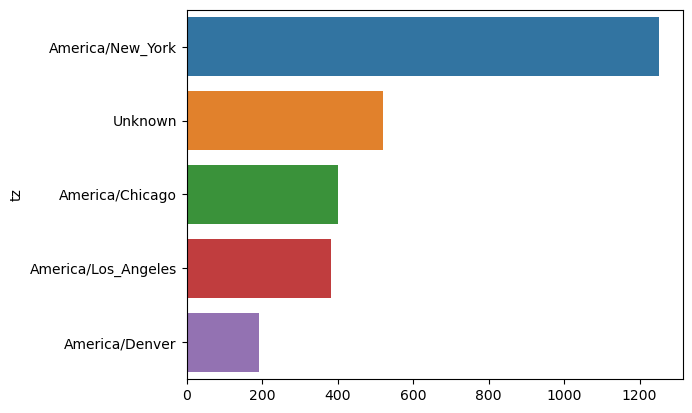

In [34]:
subset = tz_counts.head()

sns.barplot(y=subset.index, x=subset.to_numpy())
# Top time zones in the 1.usa.gov sample data

*The `a` field contains information about the browser, device, or application used to perform the URL shortening*

In [36]:
print(frame["a"][1])
print(frame["a"][50])
print(frame["a"][51][:50])
# If the value at frame["a"][51] is a string, [:50] takes the first 50 characters of that string

GoogleMaps/RochesterNY
Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2
Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9


In [37]:
results = pd.Series([x.split()[0]] for x in frame["a"].dropna())
results.head(5)

0               [Mozilla/5.0]
1    [GoogleMaps/RochesterNY]
2               [Mozilla/4.0]
3               [Mozilla/5.0]
4               [Mozilla/5.0]
dtype: object

In [38]:
results.value_counts().head(8)

[Mozilla/5.0]                 2594
[Mozilla/4.0]                  601
[GoogleMaps/RochesterNY]       121
[Opera/9.80]                    34
[TEST_INTERNET_AGENT]           24
[GoogleProducer]                21
[Mozilla/6.0]                    5
[BlackBerry8520/5.0.0.681]       4
Name: count, dtype: int64

*Now, suppose you wanted to decompose the top time zones into Windows and non-Windows users. As a simplification, let’s say that a user is on Windows if the string `"Windows"` is in the agent string. Since some of the agents are missing, we’ll exclude these from the data*

In [41]:
cframe = frame[frame["a"].notna()].copy()

# We want to then compute a value for whether or not each row is Windows:

cframe["os"] = np.where(cframe["a"].str.contains("Windows"), "Windows", "Not Windows")
cframe["os"].head(5)

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [43]:
# group the data by its time zone column and this new list of operating systems
by_tz_os = cframe.groupby(["tz", "os"])

*The group counts, analogous to the `value_counts` function, can be computed with `size`. This result is then reshaped into a table with `unstack`*

In [44]:
agg_counts = by_tz_os.size().unstack().fillna(0)

agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


*Finally, let’s select the top overall time zones. To do so, I construct an indirect index array from the row counts in `agg_counts`. After computing the row counts with `agg_counts.sum("columns")`, I can call `argsort()` to obtain an index array that can be used to sort in ascending order*

In [61]:
indexer = agg_counts.sum("columns").argsort()

indexer.values[:10]
indexer.head(10)

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

*I use `take` to select the rows in that order, then slice off the last 10 rows (largest values)*

In [46]:
count_subset = agg_counts.take(indexer[-10:])

count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [47]:
# pandas has a convenience method called nlargest that does the same thing:

agg_counts.sum(axis="columns").nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [50]:
count_subset = count_subset.stack()
count_subset.name = "total"
count_subset = count_subset.reset_index()
count_subset.head(10)

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


<Axes: xlabel='total', ylabel='tz'>

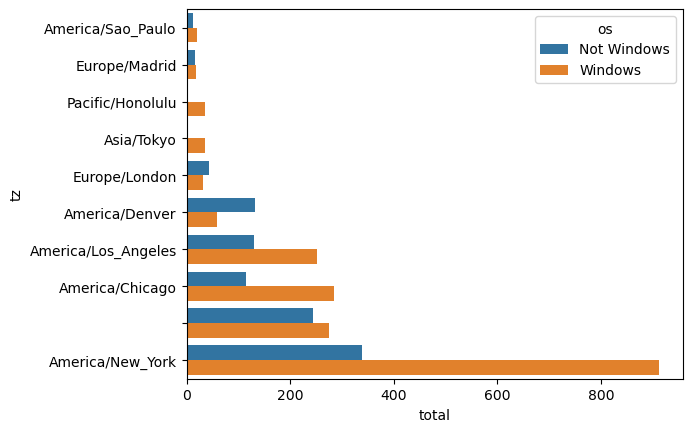

In [51]:
sns.barplot(x="total", y="tz", hue="os",  data=count_subset)

*It is a bit difficult to see the relative percentage of Windows users in the smaller groups, so let's normalize the group percentages to sum to 1*

<Axes: xlabel='normed_total', ylabel='tz'>

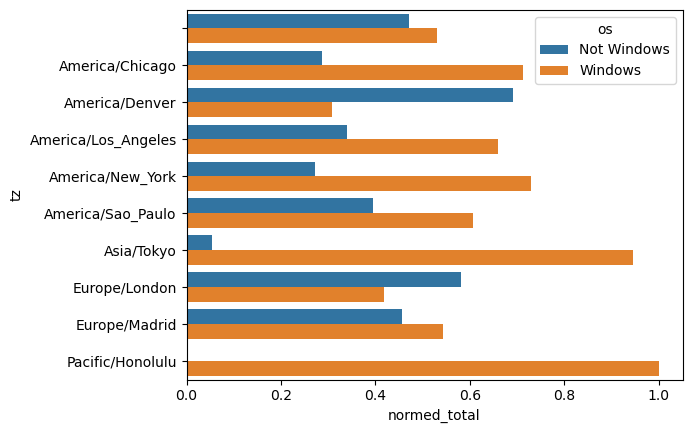

In [57]:
def norm_total(group):
    group["normed_total"] = group["total"] / group["total"].sum()
    return group


results = count_subset.groupby("tz").apply(norm_total)
sns.barplot(x="normed_total", y="tz", hue="os",  data=results)

*We could have computed the normalized sum more efficiently by using the `transform` method with `groupby`*

<Axes: xlabel='normed_total', ylabel='tz'>

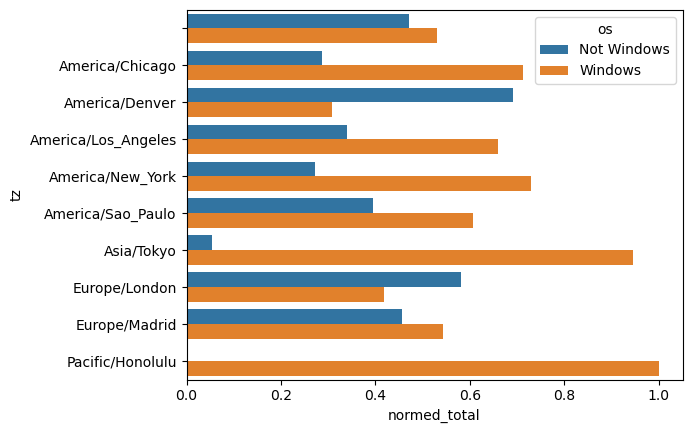

In [60]:
g = count_subset.groupby("tz")

def norm_total2(group):
    group["normed_total"] = count_subset["total"] / g["total"].transform("sum")
    return group

results = count_subset.groupby("tz").apply(norm_total2)
sns.barplot(x="normed_total", y="tz", hue="os",  data=results)